In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
RSEED = 50

pd.set_option('display.max.columns', None)

%matplotlib inline
sns.set_style('white')

# Objective of Home Credit

Giving credits to people who don't get traditional credit

* Give credits to people
* Predict if a person is credit worthy
* Lower default risk by identifying patterns in historical data

# Reading and Understanding the Data

In [3]:
# Read the data
df = pd.read_csv("Home_Loan/application_train.csv.tar.gz")

# Rename the first column
df.rename(columns = {"application_train.csv":"SK_ID_CURR"}, inplace = True)

# Print shape
print(f"The dataset contains {df.shape[0]:,} obsevations in {df.shape[1]:,} columns.")

The dataset contains 307,512 obsevations in 122 columns.


<details><summary>
    Click here for the column names and descriptions for the Home_Loan dataset
</summary>
    
 Column name        | Description                                           
--------------------|-------------------------------------------------------
SK_ID_CURR          | ID of loan in our sample                              
TARGET              | Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE  | Identification if loan is cash or revolving - A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again.
CODE_GENDER         | Gender of the client
FLAG_OWN_CAR        | Flag if the client owns a car
FLAG_OWN_REALTY     | Flag if client owns a house or flat
CNT_CHILDREN        | Number of children the client has
AMT_INCOME_TOTAL    | Income of the client
AMT_CREDIT          | Credit amount of the loan
AMT_ANNUITY         | Loan annuity
AMT_GOODS_PRICE     | For consumer loans it is the price of the goods for which the loan is given
NAME_TYPE_SUITE     | Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE    | Clients income type (businessman, working, maternity leave,…)
NAME_EDUCATION_TYPE | Level of highest education the client achieved
NAME_FAMILY_STATUS  | Family status of the client
NAME_HOUSING_TYPE   | What is the housing situation of the client (renting, living with parents, ...)
REGION_POPULATION_RELATIVE | Normalized population of region where client lives (higher number means the client lives in more populated region)
DAYS_BIRTH          | Client's age in days at the time of application - time only relative to the application
DAYS_EMPLOYED       | How many days before the application the person started current employment - time only relative to the application
DAYS_REGISTRATION   | How many days before the application did client change his registration - time only relative to the application
DAYS_ID_PUBLISH     | How many days before the application did client change the identity document with which he applied for the loan - time only relative to the application
OWN_CAR_AGE         | Age of client's car
FLAG_MOBIL          | Did client provide mobile phone
FLAG_EMP_PHONE      | Did client provide work phone
FLAG_WORK_PHONE     | Did client provide home phone
FLAG_CONT_MOBILE    | Was mobile phone reachable
FLAG_PHONE          | Did client provide home phone
FLAG_EMAIL          | Did client provide email
OCCUPATION_TYPE     | What kind of occupation does the client have
CNT_FAM_MEMBERS     | How many family members does client have
REGION_RATING_CLIENT | Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY | Our rating of the region where client lives with taking city into account (1,2,3)
WEEKDAY_APPR_PROCESS_START | On which day of the week did the client apply for the loan
HOUR_APPR_PROCESS_START | Approximately at what hour did the client apply for the loan - rounded
REG_REGION_NOT_LIVE_REGION | Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
REG_REGION_NOT_WORK_REGION | Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
LIVE_REGION_NOT_WORK_REGION | Flag if client's contact address does not match work address (1=different, 0=same, at region level)
REG_CITY_NOT_LIVE_CITY | Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
REG_CITY_NOT_WORK_CITY | Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
LIVE_CITY_NOT_WORK_CITY | Flag if client's contact address does not match work address (1=different, 0=same, at city level)
ORGANIZATION_TYPE   | Type of organization where client works
EXT_SOURCE_1        | Normalized score from external data source
EXT_SOURCE_2        | Normalized score from external data source
EXT_SOURCE_3        | Normalized score from external data source
APARTMENTS_AVG      | Normalized information about building where the client lives: average apartment size
BASEMENTAREA_AVG    | Normalized information about building where the client lives: average basement size
YEARS_BEGINEXPLUATATION_AVG | Normalized information about building where the client lives: average begin of expluatation
YEARS_BUILD_AVG     | Normalized information about building where the client lives: average age of building
COMMONAREA_AVG      | Normalized information about building where the client lives: average common area
ELEVATORS_AVG       | Normalized information about building where the client lives: average number of elevators
ENTRANCES_AVG       | Normalized information about building where the client lives: average number of entrances
FLOORSMAX_AVG       | Normalized information about building where the client lives: average number of maximum floors
FLOORSMIN_AVG       | Normalized information about building where the client lives: average number of minimum floors
LANDAREA_AVG        | Normalized information about building where the client lives: average land area
LIVINGAPARTMENTS_AVG | Normalized information about building where the client lives: average number of living apartmens
LIVINGAREA_AVG      | Normalized information about building where the client lives: average living area
NONLIVINGAPARTMENTS_AVG | Normalized information about building where the client lives: average number of non-living apartments
NONLIVINGAREA_AVG   | Normalized information about building where the client lives: average non-living area
APARTMENTS_MODE     | Normalized information about building where the client lives: modus of apartment size
BASEMENTAREA_MODE   | Normalized information about building where the client lives: modus of basement size
YEARS_BEGINEXPLUATATION_MODE | Normalized information about building where the client lives: modus of begin of expluatation
YEARS_BUILD_MODE    | Normalized information about building where the client lives: modus of age of building
COMMONAREA_MODE     | Normalized information about building where the client lives: modus of common area
ELEVATORS_MODE      | Normalized information about building where the client lives: modus of number of elevators
ENTRANCES_MODE      | Normalized information about building where the client lives: modus of number of entrances
FLOORSMAX_MODE      | Normalized information about building where the client lives: modus of maximum number of floors
FLOORSMIN_MODE      | Normalized information about building where the client lives: modus of minumum number of floors
LANDAREA_MODE       | Normalized information about building where the client lives: modus of land area
LIVINGAPARTMENTS_MODE | Normalized information about building where the client lives: modus of number of living apartmens
LIVINGAREA_MODE     | Normalized information about building where the client lives: modus of living area
NONLIVINGAPARTMENTS_MODE | Normalized information about building where the client lives: modus of number of non-living apartmens
NONLIVINGAREA_MODE  | Normalized information about building where the client lives: modus of non-living area
APARTMENTS_MEDI     | Normalized information about building where the client lives: median of apartment size
BASEMENTAREA_MEDI   | Normalized information about building where the client lives: median of basement size
YEARS_BEGINEXPLUATATION_MEDI | Normalized information about building where the client lives: median of begin of expluatation
YEARS_BUILD_MEDI    | Normalized information about building where the client lives: median of age of building
COMMONAREA_MEDI     | Normalized information about building where the client lives: median of common area
ELEVATORS_MEDI      | Normalized information about building where the client lives: median of number of elevators
ENTRANCES_MEDI      | Normalized information about building where the client lives: median of number of entrances
FLOORSMAX_MEDI      | Normalized information about building where the client lives: median of maximum number of floors
FLOORSMIN_MEDI      | Normalized information about building where the client lives: median of minimum number of floors
LANDAREA_MEDI       | Normalized information about building where the client lives: median of land area
LIVINGAPARTMENTS_MEDI | Normalized information about building where the client lives: median of number of living apartmens
LIVINGAREA_MEDI     | Normalized information about building where the client lives: median of living area
NONLIVINGAPARTMENTS_MEDI | Normalized information about building where the client lives: median of number of non-living apartmens
NONLIVINGAREA_MEDI  | Normalized information about building where the client lives: median of living area
FONDKAPREMONT_MODE  | Normalized information about building where the client lives: modus of ?
HOUSETYPE_MODE      | Normalized information about building where the client lives: modus of house type
TOTALAREA_MODE      | Normalized information about building where the client lives: modus of total area
WALLSMATERIAL_MODE  | Normalized information about building where the client lives: modus of wall material
EMERGENCYSTATE_MODE | Normalized information about building where the client lives: modus of emergency state
OBS_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 30 days past due default
DEF_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 30 days past due
OBS_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 60 days past due default
DEF_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 60 days past due
DAYS_LAST_PHONE_CHANGE | How many days before application did client change phone
FLAG_DOCUMENT_2     | Did client provide document 2
FLAG_DOCUMENT_3     | Did client provide document 3
FLAG_DOCUMENT_4     | Did client provide document 4
FLAG_DOCUMENT_5     | Did client provide document 5
FLAG_DOCUMENT_6     | Did client provide document 6
FLAG_DOCUMENT_7     | Did client provide document 7
FLAG_DOCUMENT_8     | Did client provide document 8
FLAG_DOCUMENT_9     | Did client provide document 9
FLAG_DOCUMENT_10    | Did client provide document 10
FLAG_DOCUMENT_11    | Did client provide document 11
FLAG_DOCUMENT_12    | Did client provide document 12
FLAG_DOCUMENT_13    | Did client provide document 13
FLAG_DOCUMENT_14    | Did client provide document 14
FLAG_DOCUMENT_15    | Did client provide document 15
FLAG_DOCUMENT_16    | Did client provide document 16
FLAG_DOCUMENT_17    | Did client provide document 17
FLAG_DOCUMENT_18    | Did client provide document 18
FLAG_DOCUMENT_19    | Did client provide document 19
FLAG_DOCUMENT_20    | Did client provide document 20
FLAG_DOCUMENT_21    | Did client provide document 21
AMT_REQ_CREDIT_BUREAU_HOUR | Number of enquiries to Credit Bureau about the client one hour before application
AMT_REQ_CREDIT_BUREAU_DAY | Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
AMT_REQ_CREDIT_BUREAU_WEEK | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON | Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
AMT_REQ_CREDIT_BUREAU_QRT | Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
AMT_REQ_CREDIT_BUREAU_YEAR | Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [4]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborer

In [5]:
df.describe().round()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,307511.0,307511.0,307499.0,307233.0,307511.0,307511.0,307511.0,307511.0,307511.0,104582.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307509.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,134133.0,306851.0,246546.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,151450.0,127568.0,157504.0,103023.0,92646.0,143620.0,152683.0,154491.0,98869.0,124921.0,97312.0,153161.0,93997.0,137829.0,159080.0,306490.0,306490.0,306490.0,306490.0,307510.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278181.0,0.0,0.0,168798.0,599026.0,27109.0,538396.0,0.0,-16037.0,63815.0,-4986.0,-2994.0,12.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-963.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,102790.0,0.0,1.0,237123.0,402491.0,14494.0,369446.0,0.0,4364.0,141276.0,3523.0,1509.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
min,100002.0,0.0,0.0,25650.0,45000.0,1616.0,40500.0,0.0,-25229.0,-17912.0,-24672.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307512 entries, 0 to 307511
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  float64
 1   TARGET                        307511 non-null  float64
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  float64
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

# Hypotheses

1. Probability of loan default is higher with labour class
2. Higher probability of repayment with people having realty 
3. Loan applications are gender biased with more male candidates.
4. Most defaulter have not submitted one or more documents

# Exploring the data

Let's take a look at the distribution of the target variable.

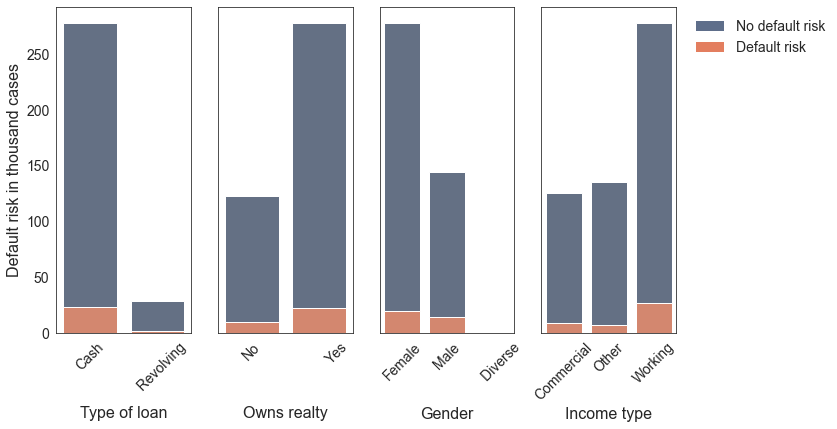

In [7]:
fig = plt.figure(figsize=(14,6))


contract_type = df.groupby("NAME_CONTRACT_TYPE")["TARGET"].value_counts().unstack().fillna(0)
contract_type["TOTAL"] = contract_type[0] + contract_type[1]

ax1 = fig.add_subplot(1,5,1)
sns.barplot(x=contract_type.index, y=contract_type["TOTAL"], data=contract_type, color = "#5e6e8a");
bottom_plot = sns.barplot(x=contract_type.index, y=contract_type[1], data=contract_type, color = "#e37e5f");
bottom_plot.set_xlabel("Type of loan", size=16);
bottom_plot.set_ylabel("Default risk in thousand cases", size=16);
ax1.set_xticklabels(labels=["Cash", "   Revolving"], rotation=45, size=14);
ax1.set_yticks([0, 50000, 100000, 150000, 200000, 250000]);
ax1.set_yticklabels(labels=[0, 50, 100, 150, 200, 250], size=14);


realty = df.groupby("FLAG_OWN_REALTY")["TARGET"].value_counts().unstack().fillna(0)
realty["TOTAL"] = realty[0] + realty[1]

ax2 = fig.add_subplot(1,5,2)
sns.barplot(x=realty.index, y=realty["TOTAL"], data=realty, color = "#5e6e8a");
bottom_plot2 = sns.barplot(x=realty.index, y=realty[1], data=realty, color = "#e37e5f");
bottom_plot2.set_xlabel("Owns realty", size=16);
ax2.set_xticklabels(labels=["No", "             Yes"], rotation=45, size=14);
ax2.set_yticklabels("");
ax2.set_ylabel("");


gender = df.groupby("CODE_GENDER")["TARGET"].value_counts().unstack().fillna(0)
gender["TOTAL"] = gender[0] + gender[1]

ax3 = fig.add_subplot(1,5,3)
sns.barplot(x=gender.index, y=gender["TOTAL"], data=gender, color = "#5e6e8a");
bottom_plot3 = sns.barplot(x=gender.index, y=gender[1], data=gender, color = "#e37e5f");
bottom_plot3.set_xlabel("Gender", size=16);
ax3.set_xticklabels(labels=["Female", "Male", "       Diverse"], rotation=45, size=14);
ax3.set_yticklabels("");
ax3.set_ylabel("");


income_type = df[["NAME_INCOME_TYPE", "TARGET"]]
income_type.replace(to_replace=["Pensioner", "State servant", "Unemployed",
                                "Student", "Businessman", "Maternity leave"],
                    value=["Other", "Other", "Other", "Other", "Other", "Other"], inplace=True)
income_type = income_type.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts().unstack()
income_type["TOTAL"] = income_type[0] + income_type[1]

ax4 = fig.add_subplot(1,5,4)
sns.barplot(x=income_type.index, y=income_type["TOTAL"], data=income_type, color = "#5e6e8a");
bottom_plot4 = sns.barplot(x=income_type.index, y=income_type[1], data=income_type, color = "#e37e5f");
bottom_plot4.set_xlabel("Income type", size=16);
ax4.set_xticklabels(labels=["Commercial", "Other", "Working"], rotation=45, size=14);
ax4.set_yticklabels("");
ax4.set_ylabel("");


topbar = plt.Rectangle((0,0),1,1,fc="#5e6e8a", edgecolor="none");
bottombar = plt.Rectangle((0,0),1,1,fc="#e37e5f",  edgecolor="none");
legend = plt.legend([topbar, bottombar], ["No default risk", "Default risk"], loc=1, bbox_to_anchor=(2.2, 1), ncol=1, prop={'size':14});
legend.draw_frame(False)

# Splitting an Cleaning the Data

From the df.info() method we can see that the values of many columns are of the wrong type. In addition, df.describe() shows that a lot of values are not normalized. The following function cleans the data. Output will be a cleaned target variable in y and cleaned features in data frame X. df itself remains untouched for data exploration. But before that we have to split into train and test data, because they will handled slightly different.

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborer

In [9]:
# Splitting the data with stratifying due imbalanced data
df.dropna(subset=["TARGET"], inplace=True)
y = df.pop("TARGET")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = RSEED)

In [10]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

def clean_data(X, y, test=True):
    global mm_scaler, std_scaler
    
    df = pd.concat([X, y], axis=1)
    
    # Drop rows where target value is missing
    df.dropna(subset=["TARGET"], inplace=True)
    
    # Drop rows where important monetary values are missing
    df.dropna(subset=["AMT_INCOME_TOTAL", "AMT_CREDIT",
                      "AMT_ANNUITY", "AMT_GOODS_PRICE"],
              inplace=True)
    
    # Drop outliers
    if not test:
        idx = np.all(stats.zscore(df[["AMT_INCOME_TOTAL", "AMT_CREDIT",
                                      "AMT_ANNUITY", "AMT_GOODS_PRICE"]]) < 3, axis=1)
        df = df[idx]
    
    # Drop outlier from "DAYS_EMPLOYED" and the "SOCIAL_CIRCLE" columns
    df.drop(index=df[df["DAYS_EMPLOYED"] >= 50000].index, inplace=True)
    df.drop(index=df[df["OBS_30_CNT_SOCIAL_CIRCLE"] >= 100].index, inplace=True)
    df.drop(index=df[df["DEF_30_CNT_SOCIAL_CIRCLE"] >= 100].index, inplace=True)
    df.drop(index=df[df["OBS_60_CNT_SOCIAL_CIRCLE"] >= 100].index, inplace=True)
    df.drop(index=df[df["DEF_60_CNT_SOCIAL_CIRCLE"] >= 100].index, inplace=True)
    
    # Create list y with target values
    y = df["TARGET"].astype("int").astype("category")
    
    # Create DataFrame X for all features
    X = pd.DataFrame()
    
    # Copy already correct columns
    X["REGION_POPULATION_RELATIVE"] = df["REGION_POPULATION_RELATIVE"]
    
    # Convert data types
    X["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y", "N"], [1, 0]).astype("int")
    X["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y", "N"], [1, 0]).astype("int")
    X["REG_REGION_NOT_LIVE_REGION"] = df["REG_REGION_NOT_LIVE_REGION"].astype("int")
    X["REG_REGION_NOT_WORK_REGION"] = df["REG_REGION_NOT_WORK_REGION"].astype("int")
    X["LIVE_REGION_NOT_WORK_REGION"] = df["LIVE_REGION_NOT_WORK_REGION"].astype("int")
    X["REG_CITY_NOT_LIVE_CITY"] = df["REG_CITY_NOT_LIVE_CITY"].astype("int")
    X["REG_CITY_NOT_WORK_CITY"] = df["REG_CITY_NOT_WORK_CITY"].astype("int")
    X["FLAG_DOCUMENT_2"] = df["FLAG_DOCUMENT_2"].astype("int")
    X["FLAG_DOCUMENT_3"] = df["FLAG_DOCUMENT_3"].astype("int")
    X["FLAG_DOCUMENT_4"] = df["FLAG_DOCUMENT_4"].astype("int")
    X["FLAG_DOCUMENT_5"] = df["FLAG_DOCUMENT_5"].astype("int")
    X["FLAG_DOCUMENT_6"] = df["FLAG_DOCUMENT_6"].astype("int")
    X["FLAG_DOCUMENT_7"] = df["FLAG_DOCUMENT_7"].astype("int")
    X["FLAG_DOCUMENT_8"] = df["FLAG_DOCUMENT_8"].astype("int")
    X["FLAG_DOCUMENT_9"] = df["FLAG_DOCUMENT_9"].astype("int")
    X["FLAG_DOCUMENT_10"] = df["FLAG_DOCUMENT_10"].astype("int")
    X["FLAG_DOCUMENT_11"] = df["FLAG_DOCUMENT_11"].astype("int")
    X["FLAG_DOCUMENT_12"] = df["FLAG_DOCUMENT_12"].astype("int")
    X["FLAG_DOCUMENT_13"] = df["FLAG_DOCUMENT_13"].astype("int")
    X["FLAG_DOCUMENT_14"] = df["FLAG_DOCUMENT_14"].astype("int")
    X["FLAG_DOCUMENT_15"] = df["FLAG_DOCUMENT_15"].astype("int")
    X["FLAG_DOCUMENT_16"] = df["FLAG_DOCUMENT_16"].astype("int")
    X["FLAG_DOCUMENT_17"] = df["FLAG_DOCUMENT_17"].astype("int")
    X["FLAG_DOCUMENT_18"] = df["FLAG_DOCUMENT_18"].astype("int")
    X["FLAG_DOCUMENT_19"] = df["FLAG_DOCUMENT_19"].astype("int")
    X["FLAG_DOCUMENT_20"] = df["FLAG_DOCUMENT_20"].astype("int")
    X["FLAG_DOCUMENT_21"] = df["FLAG_DOCUMENT_21"].astype("int")
    
    # Create dummy variables for categorical columns
    X = pd.concat([X, pd.get_dummies(df[["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_TYPE_SUITE",
                                         "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                                         "NAME_HOUSING_TYPE", "ORGANIZATION_TYPE"]],
                                     drop_first=True)],  axis=1)
    
    # Filling all NaNs with mean values
    col_names = df.loc[:, "EXT_SOURCE_1" : "NONLIVINGAREA_MEDI"].columns
    X[col_names] = df[col_names].fillna(value=df[col_names].median())
    X["TOTALAREA_MODE"] = df["TOTALAREA_MODE"].fillna(value=df["TOTALAREA_MODE"].median())
    
    social_circle = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                     "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
    X[social_circle] = df[social_circle].fillna(value=df[social_circle].median())
    
    enquiries = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
                 "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
                 "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
    X[enquiries] = df[enquiries].fillna(value=df[enquiries].median())    
    
    # Making time span variables positive
    timespanes = ["DAYS_BIRTH", "DAYS_EMPLOYED",
                 "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
    X[timespanes] = df[timespanes] * -1
    
    # Use Scaler
    std_scaled = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
                  "AMT_GOODS_PRICE", "REGION_RATING_CLIENT_W_CITY"]
    X["CNT_CHILDREN"] = df["CNT_CHILDREN"]
    mm_scaled = ["CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION",
                 "DAYS_ID_PUBLISH", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                 "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR",
                 "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
                 "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
        
    if test:
        X[std_scaled] = std_scaler.transform(df[std_scaled])
        X[mm_scaled] = mm_scaler.transform(X[mm_scaled])
    else:
        X[std_scaled] = std_scaler.fit_transform(df[std_scaled])
        X[mm_scaled] = mm_scaler.fit_transform(X[mm_scaled])
    
    return X, y

In [11]:
X_train_cleaned, y_train_cleaned = clean_data(X_train, y_train, test=False)

In [12]:
print(f"The cleaned target variable contains {y_train_cleaned.shape[0]:,} obsevations.")

The cleaned target variable contains 164,713 obsevations.


In [13]:
print(f"The cleaned dataset contains {X_train_cleaned.shape[0]:,} obsevations in {X_train_cleaned.shape[1]:,} columns.")

The cleaned dataset contains 164,713 obsevations in 178 columns.


In [14]:
X_train_cleaned.head()

,REGION_POPULATION_RELATIVE,FLAG_OWN_CAR,FLAG_OWN_REALTY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOC

In [15]:
X_test_cleaned, y_test_cleaned = clean_data(X_test, y_test, test=True)

In [16]:
print(f"The cleaned testset contains {X_test_cleaned.shape[0]:,} obsevations in {X_test_cleaned.shape[1]:,} columns.")

The cleaned testset contains 83,180 obsevations in 178 columns.


# Backup

In [17]:
print(y.value_counts())

0.0    282686
1.0     24825
Name: TARGET, dtype: int64


In [18]:
print(df["NAME_INCOME_TYPE"].value_counts())

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


In [19]:
print(df["NAME_CONTRACT_TYPE"].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [20]:
print(df["CODE_GENDER"].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [21]:
print(df["FLAG_OWN_CAR"].value_counts())
print(df["FLAG_OWN_REALTY"].value_counts())

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


0.0     215371
1.0      61119
2.0      26749
3.0       3717
4.0        429
5.0         84
6.0         21
7.0          7
14.0         3
12.0         2
10.0         2
8.0          2
19.0         2
9.0          2
11.0         1
Name: CNT_CHILDREN, dtype: int64


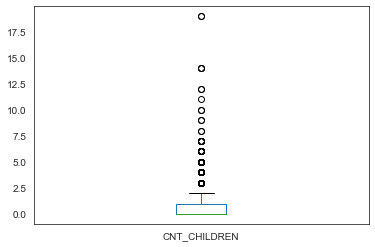

In [22]:
print(df["CNT_CHILDREN"].value_counts())
df["CNT_CHILDREN"].plot(kind="box");

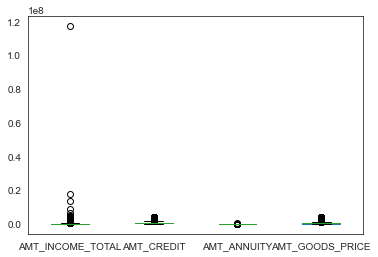

In [23]:
df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].plot(kind="box");

In [24]:
print(df["NAME_TYPE_SUITE"].value_counts())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


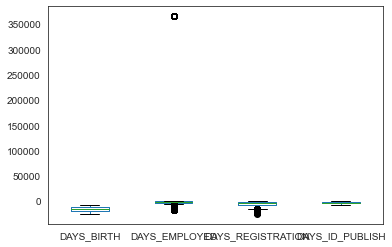

In [25]:
df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].plot(kind="box");

In [26]:
contacts = ["TARGET", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE",
            "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]

mask = np.zeros_like(df[contacts].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation Matrix',fontsize=16)

sns.heatmap(df[contacts].corr(), linewidths=0.25, cmap="Blues", annot=True, mask=mask);

KeyError: "['TARGET'] not in index"

In [ ]:
documents = ["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4",
             "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7",
             "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
             "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
             "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
             "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19",
             "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]

mask = np.zeros_like(df[documents].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation Matrix',fontsize=16)

sns.heatmap(df[documents].corr(), linewidths=0.25, cmap="Blues", annot=True, mask=mask);

In [ ]:
df["OCCUPATION_TYPE"].value_counts() # Lots of missing values / similar data in NAME_INCOME_TYPE

In [ ]:
df["CNT_FAM_MEMBERS"].value_counts() # similar to "CNT_CHILDREN"

In [ ]:
df[["TARGET", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]].corr() # High correlation between Ratings and low correlation with Target

In [ ]:
df["ORGANIZATION_TYPE"].value_counts() # too many values, propably best to take it out

In [ ]:
df["WEEKDAY_APPR_PROCESS_START"].value_counts()
df["HOUR_APPR_PROCESS_START"].value_counts() # both seem unnecessary

In [ ]:
df.loc[:, "EXT_SOURCE_1" : "TOTALAREA_MODE"].hist(figsize=(18, 18));

In [ ]:
social_circle = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                 "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
df[social_circle].plot(kind="box");

In [ ]:
enquiries = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
             "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
             "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
df[enquiries].plot(kind="box");